# Australia Housing Project

### Import Necessary Libraries

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


## Step 1:
- Data Preparation

In [329]:
housing = pd.read_csv("train.csv")

In [208]:
# check the data
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [209]:
#Check the number of rows and columns
housing.shape

(1460, 81)

In [210]:
#Check for Null Values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Null Values Present. We will clean them in Step 4(Data Cleaning)

In [211]:
#Cheeck the standard calculations of the data
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 2:
- Understanding the Data Dictionary

In [278]:
# MSSubClass: Identifies the type of dwelling involved in the sale.       

#         20      1-STORY 1946 & NEWER ALL STYLES
#         30      1-STORY 1945 & OLDER
#         40      1-STORY W/FINISHED ATTIC ALL AGES
#         45      1-1/2 STORY - UNFINISHED ALL AGES
#         50      1-1/2 STORY FINISHED ALL AGES
#         60      2-STORY 1946 & NEWER
#         70      2-STORY 1945 & OLDER
#         75      2-1/2 STORY ALL AGES
#         80      SPLIT OR MULTI-LEVEL
#         85      SPLIT FOYER
#         90      DUPLEX - ALL STYLES AND AGES
#        120      1-STORY PUD (Planned Unit Development) - 1946 & NEWER
#        150      1-1/2 STORY PUD - ALL AGES
#        160      2-STORY PUD - 1946 & NEWER
#        180      PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
#        190      2 FAMILY CONVERSION - ALL STYLES AND AGES

# MSZoning: Identifies the general zoning classification of the sale.
                
#        A        Agriculture
#        C        Commercial
#        FV       Floating Village Residential
#        I        Industrial
#        RH       Residential High Density
#        RL       Residential Low Density
#        RP       Residential Low Density Park 
#        RM       Residential Medium Density
        
# LotFrontage: Linear feet of street connected to property

# LotArea: Lot size in square feet

# Street: Type of road access to property

#        Grvl     Gravel  
#        Pave     Paved
        
# Alley: Type of alley access to property

#        Grvl     Gravel
#        Pave     Paved
#        NA       No alley access
                
# LotShape: General shape of property

#        Reg      Regular 
#        IR1      Slightly irregular
#        IR2      Moderately Irregular
#        IR3      Irregular
       
# LandContour: Flatness of the property

#        Lvl      Near Flat/Level 
#        Bnk      Banked - Quick and significant rise from street grade to building
#        HLS      Hillside - Significant slope from side to side
#        Low      Depression
                
# Utilities: Type of utilities available
                
#        AllPub   All public Utilities (E,G,W,& S)        
#        NoSewr   Electricity, Gas, and Water (Septic Tank)
#        NoSeWa   Electricity and Gas Only
#        ELO      Electricity only        
        
# LotConfig: Lot configuration

#        Inside   Inside lot
#        Corner   Corner lot
#        CulDSac  Cul-de-sac
#        FR2      Frontage on 2 sides of property
#        FR3      Frontage on 3 sides of property
        
# LandSlope: Slope of property
                
#        Gtl      Gentle slope
#        Mod      Moderate Slope  
#        Sev      Severe Slope
        
# Neighborhood: Physical locations within Ames city limits

#        Blmngtn  Bloomington Heights
#        Blueste  Bluestem
#        BrDale   Briardale
#        BrkSide  Brookside
#        ClearCr  Clear Creek
#        CollgCr  College Creek
#        Crawfor  Crawford
#        Edwards  Edwards
#        Gilbert  Gilbert
#        IDOTRR   Iowa DOT and Rail Road
#        MeadowV  Meadow Village
#        Mitchel  Mitchell
#        Names    North Ames
#        NoRidge  Northridge
#        NPkVill  Northpark Villa
#        NridgHt  Northridge Heights
#        NWAmes   Northwest Ames
#        OldTown  Old Town
#        SWISU    South & West of Iowa State University
#        Sawyer   Sawyer
#        SawyerW  Sawyer West
#        Somerst  Somerset
#        StoneBr  Stone Brook
#        Timber   Timberland
#        Veenker  Veenker
                        
# Condition1: Proximity to various conditions
        
#        Artery   Adjacent to arterial street
#        Feedr    Adjacent to feeder street       
#        Norm     Normal  
#        RRNn     Within 200' of North-South Railroad
#        RRAn     Adjacent to North-South Railroad
#        PosN     Near positive off-site feature--park, greenbelt, etc.
#        PosA     Adjacent to postive off-site feature
#        RRNe     Within 200' of East-West Railroad
#        RRAe     Adjacent to East-West Railroad
        
# Condition2: Proximity to various conditions (if more than one is present)
                
#        Artery   Adjacent to arterial street
#        Feedr    Adjacent to feeder street       
#        Norm     Normal  
#        RRNn     Within 200' of North-South Railroad
#        RRAn     Adjacent to North-South Railroad
#        PosN     Near positive off-site feature--park, greenbelt, etc.
#        PosA     Adjacent to postive off-site feature
#        RRNe     Within 200' of East-West Railroad
#        RRAe     Adjacent to East-West Railroad
        
# BldgType: Type of dwelling
                
#        1Fam     Single-family Detached  
#        2FmCon   Two-family Conversion; originally built as one-family dwelling
#        Duplx    Duplex
#        TwnhsE   Townhouse End Unit
#        TwnhsI   Townhouse Inside Unit
        
# HouseStyle: Style of dwelling
        
#        1Story   One story
#        1.5Fin   One and one-half story: 2nd level finished
#        1.5Unf   One and one-half story: 2nd level unfinished
#        2Story   Two story
#        2.5Fin   Two and one-half story: 2nd level finished
#        2.5Unf   Two and one-half story: 2nd level unfinished
#        SFoyer   Split Foyer
#        SLvl     Split Level
        
# OverallQual: Rates the overall material and finish of the house

#        10       Very Excellent
#        9        Excellent
#        8        Very Good
#        7        Good
#        6        Above Average
#        5        Average
#        4        Below Average
#        3        Fair
#        2        Poor
#        1        Very Poor
        
# OverallCond: Rates the overall condition of the house

#        10       Very Excellent
#        9        Excellent
#        8        Very Good
#        7        Good
#        6        Above Average   
#        5        Average
#        4        Below Average   
#        3        Fair
#        2        Poor
#        1        Very Poor
                
# YearBuilt: Original construction date

# YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

# RoofStyle: Type of roof

#        Flat     Flat
#        Gable    Gable
#        Gambrel  Gabrel (Barn)
#        Hip      Hip
#        Mansard  Mansard
#        Shed     Shed
                
# RoofMatl: Roof material

#        ClyTile  Clay or Tile
#        CompShg  Standard (Composite) Shingle
#        Membran  Membrane
#        Metal    Metal
#        Roll     Roll
#        Tar&Grv  Gravel & Tar
#        WdShake  Wood Shakes
#        WdShngl  Wood Shingles
                
# Exterior1st: Exterior covering on house

#        AsbShng  Asbestos Shingles
#        AsphShn  Asphalt Shingles
#        BrkComm  Brick Common
#        BrkFace  Brick Face
#        CBlock   Cinder Block
#        CemntBd  Cement Board
#        HdBoard  Hard Board
#        ImStucc  Imitation Stucco
#        MetalSd  Metal Siding
#        Other    Other
#        Plywood  Plywood
#        PreCast  PreCast 
#        Stone    Stone
#        Stucco   Stucco
#        VinylSd  Vinyl Siding
#        Wd Sdng  Wood Siding
#        WdShing  Wood Shingles
        
# Exterior2nd: Exterior covering on house (if more than one material)

#        AsbShng  Asbestos Shingles
#        AsphShn  Asphalt Shingles
#        BrkComm  Brick Common
#        BrkFace  Brick Face
#        CBlock   Cinder Block
#        CemntBd  Cement Board
#        HdBoard  Hard Board
#        ImStucc  Imitation Stucco
#        MetalSd  Metal Siding
#        Other    Other
#        Plywood  Plywood
#        PreCast  PreCast
#        Stone    Stone
#        Stucco   Stucco
#        VinylSd  Vinyl Siding
#        Wd Sdng  Wood Siding
#        WdShing  Wood Shingles
        
# MasVnrType: Masonry veneer type

#        BrkCmn   Brick Common
#        BrkFace  Brick Face
#        CBlock   Cinder Block
#        None     None
#        Stone    Stone
        
# MasVnrArea: Masonry veneer area in square feet

# ExterQual: Evaluates the quality of the material on the exterior 
                
#        Ex       Excellent
#        Gd       Good
#        TA       Average/Typical
#        Fa       Fair
#        Po       Poor
                
# ExterCond: Evaluates the present condition of the material on the exterior
                
#        Ex       Excellent
#        Gd       Good
#        TA       Average/Typical
#        Fa       Fair
#        Po       Poor
                
# Foundation: Type of foundation
                
#        BrkTil   Brick & Tile
#        CBlock   Cinder Block
#        PConc    Poured Contrete 
#        Slab     Slab
#        Stone    Stone
#        Wood     Wood
                
# BsmtQual: Evaluates the height of the basement

#        Ex       Excellent (100+ inches) 
#        Gd       Good (90-99 inches)
#        TA       Typical (80-89 inches)
#        Fa       Fair (70-79 inches)
#        Po       Poor (<70 inches
#        NA       No Basement
                
# BsmtCond: Evaluates the general condition of the basement

#        Ex       Excellent
#        Gd       Good
#        TA       Typical - slight dampness allowed
#        Fa       Fair - dampness or some cracking or settling
#        Po       Poor - Severe cracking, settling, or wetness
#        NA       No Basement
        
# BsmtExposure: Refers to walkout or garden level walls

#        Gd       Good Exposure
#        Av       Average Exposure (split levels or foyers typically score average or above)      
#        Mn       Mimimum Exposure
#        No       No Exposure
#        NA       No Basement
        
# BsmtFinType1: Rating of basement finished area

#        GLQ      Good Living Quarters
#        ALQ      Average Living Quarters
#        BLQ      Below Average Living Quarters   
#        Rec      Average Rec Room
#        LwQ      Low Quality
#        Unf      Unfinshed
#        NA       No Basement
                
# BsmtFinSF1: Type 1 finished square feet

# BsmtFinType2: Rating of basement finished area (if multiple types)

#        GLQ      Good Living Quarters
#        ALQ      Average Living Quarters
#        BLQ      Below Average Living Quarters   
#        Rec      Average Rec Room
#        LwQ      Low Quality
#        Unf      Unfinshed
#        NA       No Basement

# BsmtFinSF2: Type 2 finished square feet

# BsmtUnfSF: Unfinished square feet of basement area

# TotalBsmtSF: Total square feet of basement area

# Heating: Type of heating
                
#        Floor    Floor Furnace
#        GasA     Gas forced warm air furnace
#        GasW     Gas hot water or steam heat
#        Grav     Gravity furnace 
#        OthW     Hot water or steam heat other than gas
#        Wall     Wall furnace
                
# HeatingQC: Heating quality and condition

#        Ex       Excellent
#        Gd       Good
#        TA       Average/Typical
#        Fa       Fair
#        Po       Poor
                
# CentralAir: Central air conditioning

#        N        No
#        Y        Yes
                
# Electrical: Electrical system

#        SBrkr    Standard Circuit Breakers & Romex
#        FuseA    Fuse Box over 60 AMP and all Romex wiring (Average)     
#        FuseF    60 AMP Fuse Box and mostly Romex wiring (Fair)
#        FuseP    60 AMP Fuse Box and mostly knob & tube wiring (poor)
#        Mix      Mixed
                
# 1stFlrSF: First Floor square feet
 
# 2ndFlrSF: Second floor square feet

# LowQualFinSF: Low quality finished square feet (all floors)

# GrLivArea: Above grade (ground) living area square feet

# BsmtFullBath: Basement full bathrooms

# BsmtHalfBath: Basement half bathrooms

# FullBath: Full bathrooms above grade

# HalfBath: Half baths above grade

# Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

# Kitchen: Kitchens above grade

# KitchenQual: Kitchen quality

#        Ex       Excellent
#        Gd       Good
#        TA       Typical/Average
#        Fa       Fair
#        Po       Poor
        
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

# Functional: Home functionality (Assume typical unless deductions are warranted)

#        Typ      Typical Functionality
#        Min1     Minor Deductions 1
#        Min2     Minor Deductions 2
#        Mod      Moderate Deductions
#        Maj1     Major Deductions 1
#        Maj2     Major Deductions 2
#        Sev      Severely Damaged
#        Sal      Salvage only
                
# Fireplaces: Number of fireplaces

# FireplaceQu: Fireplace quality

#        Ex       Excellent - Exceptional Masonry Fireplace
#        Gd       Good - Masonry Fireplace in main level
#        TA       Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#        Fa       Fair - Prefabricated Fireplace in basement
#        Po       Poor - Ben Franklin Stove
#        NA       No Fireplace
                
# GarageType: Garage location
                
#        2Types   More than one type of garage
#        Attchd   Attached to home
#        Basment  Basement Garage
#        BuiltIn  Built-In (Garage part of house - typically has room above garage)
#        CarPort  Car Port
#        Detchd   Detached from home
#        NA       No Garage
                
# GarageYrBlt: Year garage was built
                
# GarageFinish: Interior finish of the garage

#        Fin      Finished
#        RFn      Rough Finished  
#        Unf      Unfinished
#        NA       No Garage
                
# GarageCars: Size of garage in car capacity

# GarageArea: Size of garage in square feet

# GarageQual: Garage quality

#        Ex       Excellent
#        Gd       Good
#        TA       Typical/Average
#        Fa       Fair
#        Po       Poor
#        NA       No Garage
                
# GarageCond: Garage condition

#        Ex       Excellent
#        Gd       Good
#        TA       Typical/Average
#        Fa       Fair
#        Po       Poor
#        NA       No Garage
                
# PavedDrive: Paved driveway

#        Y        Paved 
#        P        Partial Pavement
#        N        Dirt/Gravel
                
# WoodDeckSF: Wood deck area in square feet

# OpenPorchSF: Open porch area in square feet

# EnclosedPorch: Enclosed porch area in square feet

# 3SsnPorch: Three season porch area in square feet

# ScreenPorch: Screen porch area in square feet

# PoolArea: Pool area in square feet

# PoolQC: Pool quality
                
#        Ex       Excellent
#        Gd       Good
#        TA       Average/Typical
#        Fa       Fair
#        NA       No Pool
                
# Fence: Fence quality
                
#        GdPrv    Good Privacy
#        MnPrv    Minimum Privacy
#        GdWo     Good Wood
#        MnWw     Minimum Wood/Wire
#        NA       No Fence
        
# MiscFeature: Miscellaneous feature not covered in other categories
                
#        Elev     Elevator
#        Gar2     2nd Garage (if not described in garage section)
#        Othr     Other
#        Shed     Shed (over 100 SF)
#        TenC     Tennis Court
#        NA       None
                
# MiscVal: $Value of miscellaneous feature

# MoSold: Month Sold (MM)

# YrSold: Year Sold (YYYY)

# SaleType: Type of sale
                
#        WD       Warranty Deed - Conventional
#        CWD      Warranty Deed - Cash
#        VWD      Warranty Deed - VA Loan
#        New      Home just constructed and sold
#        COD      Court Officer Deed/Estate
#        Con      Contract 15% Down payment regular terms
#        ConLw    Contract Low Down payment and low interest
#        ConLI    Contract Low Interest
#        ConLD    Contract Low Down
#        Oth      Other
                
# SaleCondition: Condition of sale

#        Normal   Normal Sale
#        Abnorml  Abnormal Sale -  trade, foreclosure, short sale
#        AdjLand  Adjoining Land Purchase
#        Alloca   Allocation - two linked properties with separate deeds, typically condo with a garage unit      
#        Family   Sale between family members
#        Partial  Home was not completed when last assessed (associated with New Homes)


In [330]:
# Columns MSSubClass, OverallQual, OverallCond need to be converted to object type
# Column LotFrontage and MasVnrArea needs to be converted to numeric type.

## Convert three columns to 'object' type as mentioned above
housing[['MSSubClass', 'OverallQual', 'OverallCond']] = housing[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
housing['LotFrontage'] = pd.to_numeric(housing['LotFrontage'], errors='coerce')
housing['MasVnrArea'] = pd.to_numeric(housing['MasVnrArea'], errors='coerce')

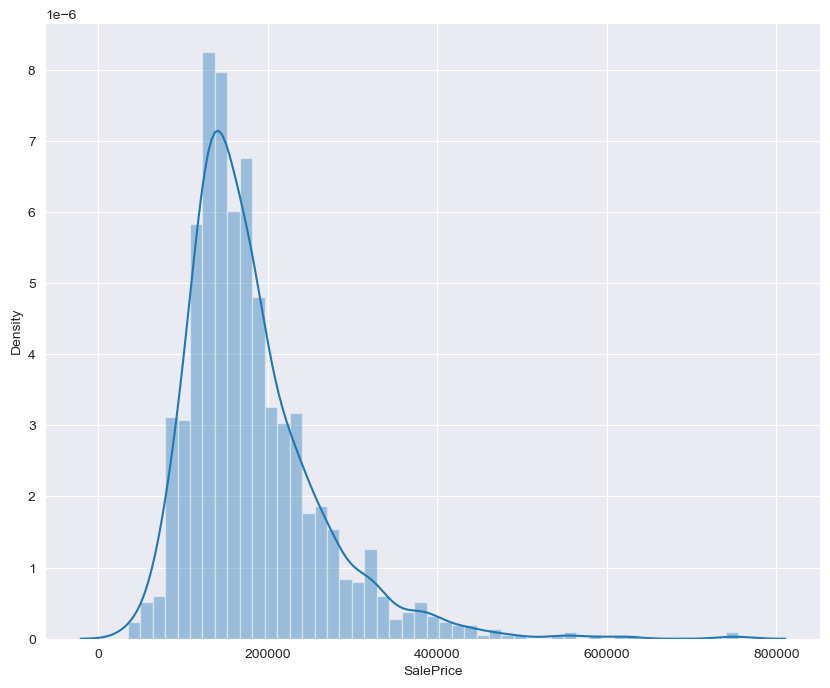

In [331]:
#Analyse the target variable 'SalePrice'
plt.figure(figsize=[10,8])
sns.distplot(housing['SalePrice']);

In [332]:
#Sale price is Right Skewed

housing['SalePrice'].skew()

1.8828757597682129

In [333]:
#We should log transform the target variable
housing['SalePrice'] = np.log(housing['SalePrice'])

In [334]:
#Check again the skew
housing['SalePrice'].skew()

0.12133506220520406

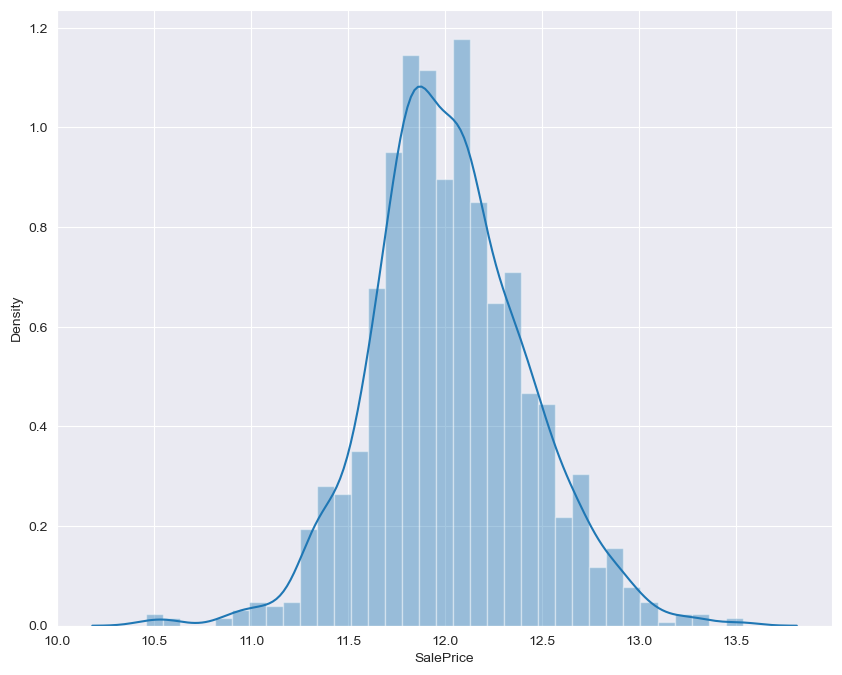

In [335]:
#Plot 'SalePrice' distribution plot again to check
plt.figure(figsize=[10,8])
sns.distplot(housing['SalePrice']);

### Step 3:
 - Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable. Let's see whether that's true in this case.

We'll first subset the list of all (independent) numeric variables, and then make a pairwise plot.

In [336]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,12.247694
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,12.109011
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,12.317167
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,11.849398
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,12.429216


In [337]:
#Drop Id

housing_numeric = housing_numeric.drop(['Id'], axis = 1)
housing_numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,12.247694
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,12.109011
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,12.317167
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,11.849398
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,12.429216


In [338]:
# correlation matrix
cor = housing_numeric.corr()
cor

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.426095,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.355878
LotArea,0.426095,1.000000,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
YearBuilt,0.123349,0.014228,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,0.088866,0.013788,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,0.193458,0.104160,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.430809
BsmtFinSF1,0.233633,0.214103,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023
BsmtFinSF2,0.049900,0.111170,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,0.004832
BsmtUnfSF,0.132644,-0.002618,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.221985
TotalBsmtSF,0.392075,0.260833,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.612134
1stFlrSF,0.457181,0.299475,0.281986,0.240379,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.596981


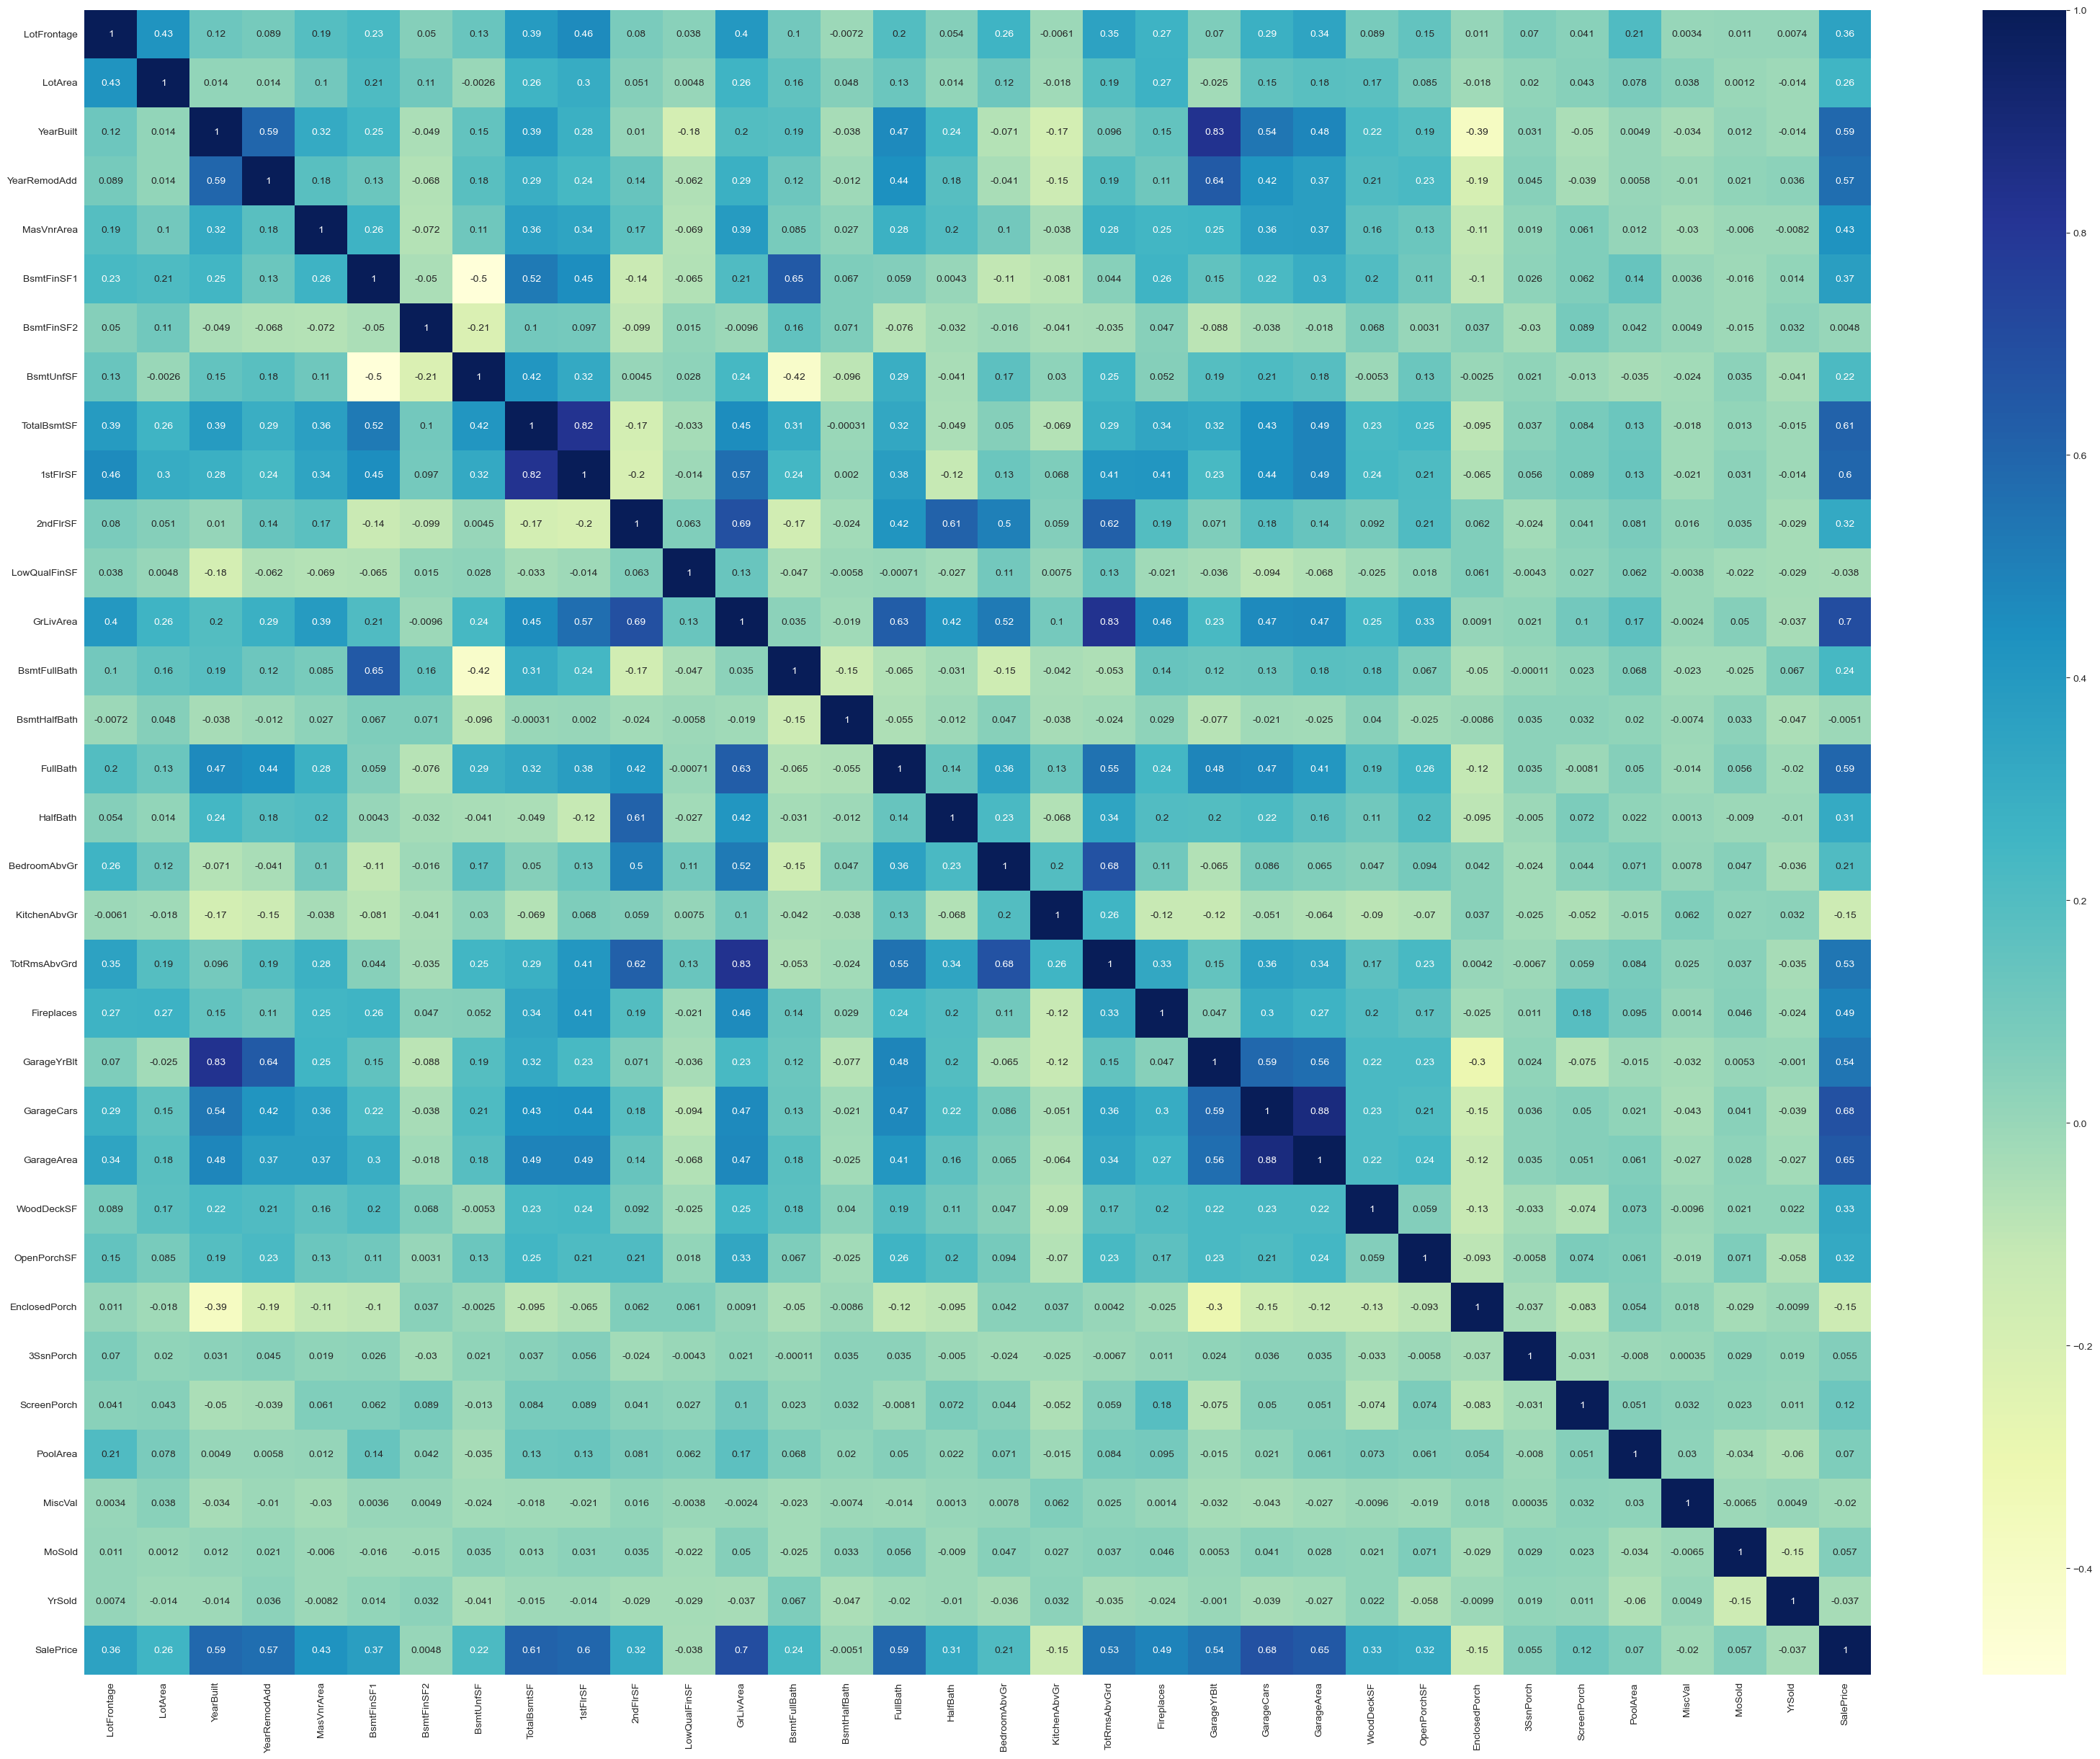

In [339]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(40,30))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

Inference from HeatMap:

- Sale Price is highly positively correlated with OverallQual, GrLivArea, TotalBsmtSF, 1stFlrSF, GarageCars, GarageArea
- Sale Price is negatively correlated with OverallCond, BsmtFinSF2, LowQualFinSF, KitchenAbvGr, EnclosedPorch, MscVal, YrSold

## Step 4:

- Data Cleaning

In [340]:
## Create new column for the age of the house
housing['Age'] = housing['YrSold'] - housing['YearBuilt']

In [341]:
## Drop the two columns from which we created new one
housing.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [342]:
#Drop Alley, FirePlaceQu, PoolQc, Fence, MiscFeature

housing = housing.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,WD,Normal,12.247694,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,WD,Normal,12.109011,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,WD,Normal,12.317167,7
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,WD,Abnorml,11.849398,91
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,WD,Normal,12.429216,8


In [343]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearRemo

In [344]:
#Replace NA values

housing['LotFrontage'] = housing['LotFrontage'].fillna(0)
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)
housing['GarageQual'] = housing['GarageQual'].fillna('NG') # NG -> No Garage
housing['GarageCond'] = housing['GarageCond'].fillna('NG')
housing['GarageFinish'] = housing['GarageFinish'].fillna('NG')
housing['GarageFinish'] = housing['GarageFinish'].fillna('NG')
housing['GarageType'] = housing['GarageType'].fillna('NG')

In [345]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearRemo

- Rest all Data is fine

## Step 5 : Data Preparation
- Prepare the Data and Build the Model

In [389]:
# split into X and y

X = housing.loc[:, ['MSZoning','LotFrontage','LotArea','Street','LotShape','LandContour','Utilities',
                    'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                    'OverallQual','OverallCond','Age','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st',
                    'Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
                    'BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                    'Heating','HeatingQC','CentralAir','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                    'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual',
                    'TotRmsAbvGrd','Functional','Fireplaces','GarageType','GarageYrBlt','GarageFinish','GarageCars',
                    'GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                    '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','SaleType','SaleCondition'
]]

y = housing['SalePrice']

In [390]:
# creating dummy variables for categorical variables

# subset all categorical variables

housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head()


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [391]:
# convert into dummies 
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [392]:
# drop categorical variables 
X = X.drop(list(housing_categorical.columns), axis=1)

In [393]:
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [394]:
X.head()

,LotFrontage,LotArea,Age,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,5,2003,196.0,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,31,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,2002,162.0,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,91,1970,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,2000,350.0,655,0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [395]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'Age', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=249)

In [396]:
X.fillna(0, inplace=True)

In [397]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Step 6: Model Building and Evaluation



### A: Linear Regression

In [398]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [399]:
from sklearn.metrics import r2_score, mean_squared_error

In [400]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9594927883515069
-1.5501672628998327e+22
6.501093226762798
1.1171833950904488e+24
0.006367378282823504
2.550647020754449e+21


### B : Ridge Regression

In [401]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [402]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [403]:
#Fitting Ridge model for alpha = 5 and printing coefficients which have been penalised
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.41553103e-03  2.98441671e-02 -5.60868610e-02  2.40568148e-02
  1.28732532e-03  2.04065414e-02  1.06210711e-02  8.27521966e-03
  3.34559746e-02  4.16483894e-02  5.08303437e-02 -8.73594104e-04
  7.27851532e-02  1.66387881e-02  1.50167171e-03  9.96025619e-03
  4.04843054e-03  6.08946400e-03 -1.98868948e-02  6.50078356e-03
  1.09063209e-02 -5.19384682e-03  2.62446212e-02  1.27485401e-02
  1.06045617e-02  3.73799170e-03  6.23143651e-03  4.95393571e-03
  1.05801543e-02 -1.93895208e-03  1.43448630e-03  4.92936375e-05
  5.72475812e-02  2.94402908e-02  1.11529989e-01  8.27503015e-02
  6.93306907e-03  2.60648619e-03 -2.05819471e-03  3.70885196e-03
  7.20977594e-04 -1.25711958e-03  5.32831427e-03 -1.95237217e-03
  7.15790832e-03 -6.64503246e-03 -1.06101435e-03 -3.53165799e-03
  3.50124065e-03 -1.79810258e-02  1.08331167e-03 -4.36023576e-03
  1.04753118e-02  8.51235463e-03  2.60715080e-03  2.86703615e-02
 -1.14507556e-02  3.67930872e-03 -6.70923983e-04 -1.79860149e-02
 -4.66499199e-03  3.66241

In [404]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)m

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9571517367529878
0.8660664550646793
6.876813847147698
9.652399197712207
0.006735371054992848
0.02203744109066714


### C : Lasso Regression

In [405]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [406]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [407]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [408]:
lasso.coef_

array([-0.00000000e+00,  2.34753283e-02, -5.67332510e-02,  2.53926689e-02,
        1.46752246e-03,  1.15862770e-02,  1.36040606e-03, -0.00000000e+00,
        4.00812393e-02,  0.00000000e+00,  0.00000000e+00, -6.43766238e-03,
        1.40652154e-01,  1.88757813e-02,  0.00000000e+00,  7.98152665e-03,
        3.42634700e-03,  0.00000000e+00, -2.00459837e-02,  6.57807613e-03,
        1.31454837e-02, -0.00000000e+00,  2.67979433e-02,  8.02006393e-03,
        9.34985754e-03,  2.75704186e-03,  2.48619676e-03,  3.71348489e-03,
        8.86946087e-03, -3.33726760e-03,  6.19479177e-05, -0.00000000e+00,
        2.44860456e-02,  1.29548240e-02,  5.12576434e-02,  2.76047792e-02,
        4.84087464e-03,  1.28981423e-03, -1.64815590e-03,  1.24373869e-03,
        0.00000000e+00, -0.00000000e+00,  2.58723249e-03, -1.34346385e-03,
        7.78089356e-03, -2.65091405e-03, -0.00000000e+00, -3.54054104e-04,
        0.00000000e+00, -1.18824761e-02,  0.00000000e+00, -4.00646465e-03,
        7.39407653e-03,  

In [409]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9523603255989929
0.865325505540838
7.645798167030675
9.70579837110768
0.0074885388511563905
0.022159357011661367


In [410]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.594928e-01,0.957152,0.952360
1,R2 Score (Test),-1.550167e+22,0.866066,0.865326
2,RSS (Train),6.501093e+00,6.876814,7.645798
3,RSS (Test),1.117183e+24,9.652399,9.705798
4,MSE (Train),7.979585e-02,0.082069,0.086536
5,MSE (Test),5.050393e+10,0.148450,0.148860


# Changes in the coefficients after regularization

In [411]:
betas = pd.DataFrame(index=X.columns)

In [412]:
betas.rows = X.columns

In [413]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [414]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotFrontage,-3.219921e-04,-0.003416,-0.000000
LotArea,3.169473e-02,0.029844,0.023475
Age,-6.831708e-02,-0.056087,-0.056733
YearRemodAdd,2.383094e-02,0.024057,0.025393
MasVnrArea,1.313672e-03,0.001287,0.001468
BsmtFinSF1,-4.400231e+10,0.020407,0.011586
BsmtFinSF2,-1.556337e+10,0.010621,0.001360
BsmtUnfSF,-4.262936e+10,0.008275,-0.000000
TotalBsmtSF,4.232434e+10,0.033456,0.040081
1stFlrSF,-9.618543e+10,0.041648,0.000000


## View the Top Variables

In [415]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

RoofMatl_CompShg    0.259595
RoofMatl_Tar&Grv    0.173271
RoofMatl_WdShngl    0.129206
MSZoning_RL         0.111530
RoofMatl_WdShake    0.103893
MSZoning_RM         0.082750
GrLivArea           0.072785
RoofMatl_Membran    0.058344
MSZoning_FV         0.057248
RoofMatl_Metal      0.056569
Name: Ridge, dtype: float64

In [416]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

RoofMatl_CompShg    0.249690
RoofMatl_Tar&Grv    0.168176
GrLivArea           0.140652
RoofMatl_WdShngl    0.124946
RoofMatl_WdShake    0.103698
RoofMatl_Membran    0.054004
RoofMatl_Metal      0.053041
MSZoning_RL         0.051258
RoofMatl_Roll       0.050063
TotalBsmtSF         0.040081
Name: Lasso, dtype: float64

##### Question 1: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 


In [421]:
alpha = 5
ridge1 = Ridge(alpha=alpha)

ridge1.fit(X_train, y_train)

Ridge(alpha=5)

In [424]:
y_pred_train = ridge1.predict(X_train)
y_pred_test = ridge1.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9571517367529878
0.8660664550646793
6.876813847147698
9.652399197712207
0.006735371054992848
0.02203744109066714


In [425]:
#Now double the alpha for Lasso 
alpha = 0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [426]:


y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9412756545141392
0.8645896828911631
9.424801884590085
9.758828058008072
0.0092309518947993
0.022280429356182813


In [427]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.594928e-01,0.957152,0.941276
1,R2 Score (Test),-1.550167e+22,0.866066,0.864590
2,RSS (Train),6.501093e+00,6.876814,9.424802
3,RSS (Test),1.117183e+24,9.652399,9.758828
4,MSE (Train),7.979585e-02,0.082069,0.096078
5,MSE (Test),5.050393e+10,0.148450,0.149266


#### Question 3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [428]:
#Here, we will drop the top 5 features in Lasso model and build the model again.
top_var = ['RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'GrLivArea', 'RoofMatl_WdShngl', 'RoofMatl_WdShake']
## drop them from train and test data
X_train_dropped = X_train.drop(top_var, axis=1)
X_test_dropped = X_test.drop(top_var, axis=1)

In [429]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [430]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)


{'alpha': 0.001}


In [431]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 


Lasso(alpha=0.001)

In [433]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9523603255989929
0.865325505540838
7.645798167030675
9.70579837110768
0.0074885388511563905
0.022159357011661367


In [434]:
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
ls_metric

0    0.952360
1    0.865326
2    7.645798
3    9.705798
4    0.086536
5    0.148860
Name: Lasso Regression, dtype: float64

In [435]:
#Changes in the coefficients after regularization

betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Lasso
LotFrontage,-0.000000
LotArea,0.023475
Age,-0.056733
YearRemodAdd,0.025393
MasVnrArea,0.001468
BsmtFinSF1,0.011586
BsmtFinSF2,0.001360
BsmtUnfSF,-0.000000
TotalBsmtSF,0.040081
1stFlrSF,0.000000


In [436]:
## View the top 5 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:5]

RoofMatl_CompShg    0.249690
RoofMatl_Tar&Grv    0.168176
GrLivArea           0.140652
RoofMatl_WdShngl    0.124946
RoofMatl_WdShake    0.103698
Name: Lasso, dtype: float64